# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# TODO: Fill this in based on where you saved the training and testing data
#vlpatil Keep the data in IMAGE_DATA/test.p, train.p and valid.p

training_file = "./IMAGE_DATA/train.p"
validation_file="./IMAGE_DATA/valid.p"
testing_file = "./IMAGE_DATA/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
# vlpatil we will add more images to valid data later
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

#vlpatil keep orignal sets
X_train_orig, y_train_orig = train['features'], train['labels']
# vlpatil we will add more images to valid data later
X_valid_orig, y_valid_orig = valid['features'], valid['labels']
X_test_orig, y_test_orig = test['features'], test['labels']


#vlpatil printout shape of the images for all the training, validation and testing sets
print("X_train shape:" , X_train.shape)
print("y_train shape:", y_train.shape)
print("X_vaid shape:" , X_valid.shape)
print("y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)




X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_vaid shape: (4410, 32, 32, 3)
y_valid shape: (4410,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

#vlpatil find the numbers of the image sets for each category
# TODO: Number of training examples
n_train = len(X_train)
m_train = np.mean(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)
m_validation = np.mean(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)
m_test = np.mean(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("NumOfTrg  OrigImages=",n_train,"has MeanValueOf",m_train)
print("NumOfTest OrigImages=",n_test, "has MeanValueOf",m_test)
print("ImageShape=  ",image_shape)
print("NumOfClasses=",n_classes)

NumOfTrg  OrigImages= 34799 has MeanValueOf 82.6775890369964
NumOfTest OrigImages= 12630 has MeanValueOf 82.14846036120183
ImageShape=   (32, 32, 3)
NumOfClasses= 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Selecting 21 of random images out of 34799 for display
Random 21 Sample images


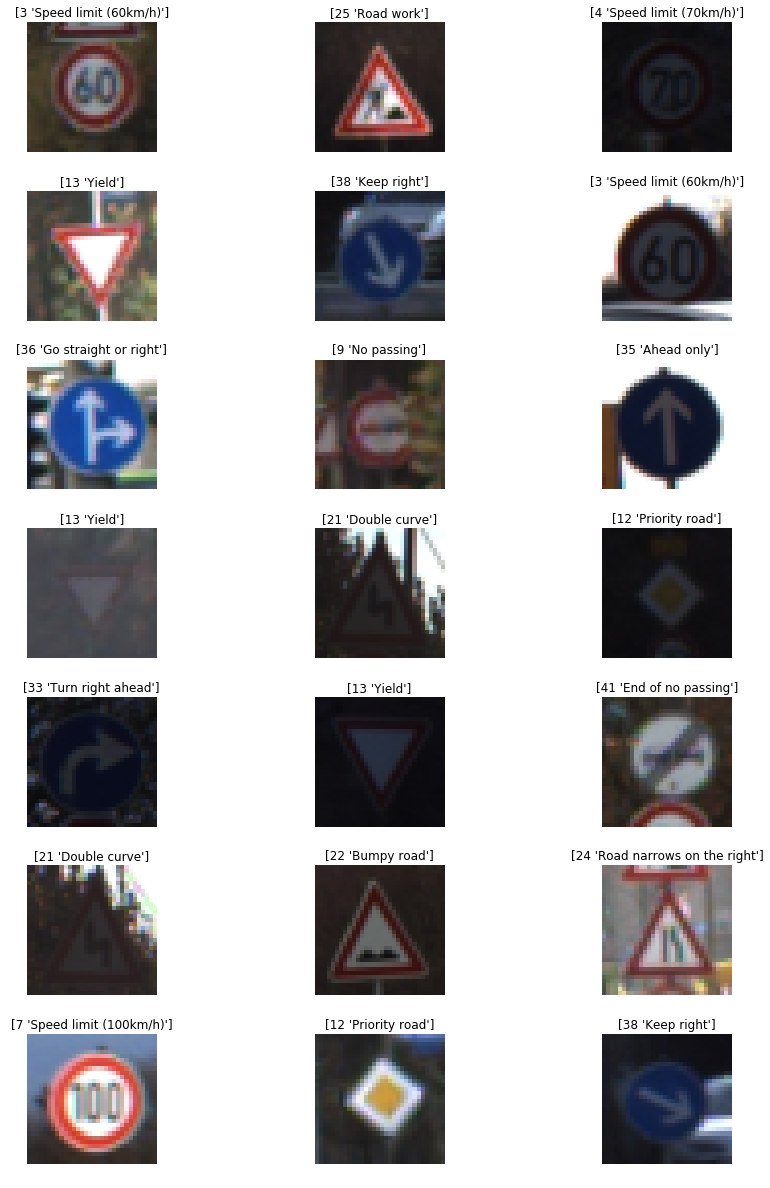

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

#vlpatil plot the images of data images
# write few subroutines for image handling

#vlaptil Return the labels for the trafic signals
def SigNamesLabel(i):
    sig_names = pd.read_csv('./signnames.csv').values
    return sig_names[i]

#vlpatil Select random samples of traffic images to display 
def RandomSample(img_data, sample_size, y_train, col):
    num_images = len(img_data)
    print("Selecting",sample_size,"of random images out of",num_images,"for display")
    r = int(sample_size / col)
    fig, ax = plt.subplots(r, col, figsize= (15, r*3))
    fig.subplots_adjust(hspace = 0.3, wspace=0.1)
    #flatten array
    ax =ax.ravel()

    for i in range(sample_size):
        index = random.randint(0, num_images)
        image = img_data[index]
        title = SigNamesLabel(y_train[index])
        ax[i].axis('off')
        ax[i].imshow(image)
        ax[i].set_title(title)

sample_size =21
col = 3
RandomSample(X_train, sample_size, y_train, col)
print("Random", sample_size, "Sample images")




Frequency distribution of all 43 Classes of images ind data set


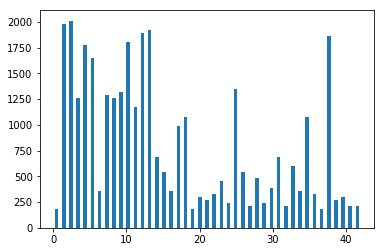

min freq of images in a data set 180
max freq of images in a data set 2010


In [4]:
#vlpatil plot histogram of all the labels and its frequency
hist, bins =np.histogram(y_train, bins=n_classes)
w = 0.5 * (bins[43] - bins[42])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center ,hist, align='center', width=w)
print("Frequency distribution of all", n_classes, "Classes of images ind data set")
plt.show()


#vlpatil get freq of each class
freqOfClass = []
for i in range(0, n_classes):
    sel = X_train[y_train == i]
    freqOfClass.append(len(sel))

print("min freq of images in a data set", min(freqOfClass))
print("max freq of images in a data set", max(freqOfClass))

    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

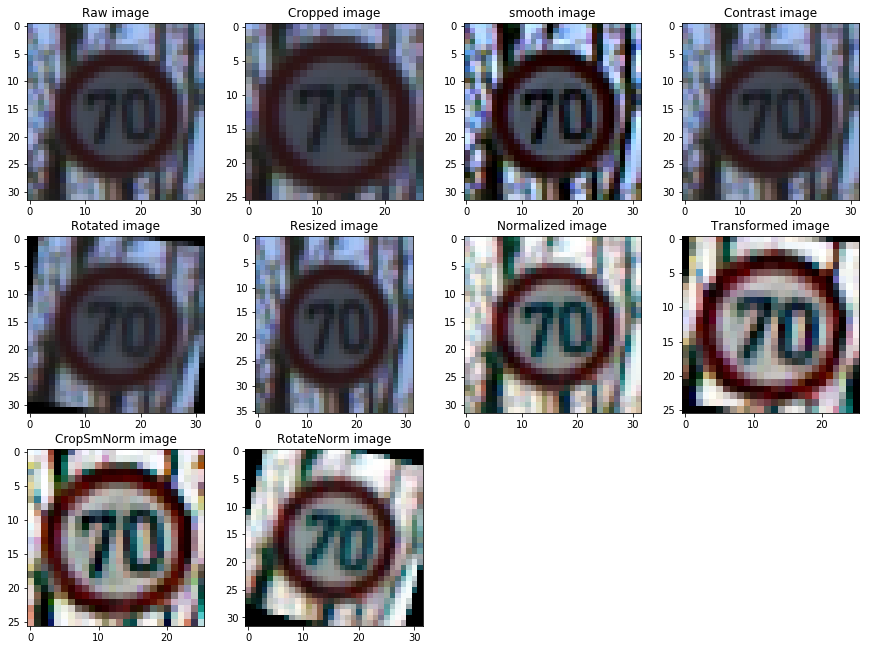

Orignal image size is (32, 32, 3)
Transformed image size is (26, 26, 3)


In [5]:
#vlpatil define useful procs that can be used for image manipulation for better learning


import cv2
img_size=X_train.shape[1]

#vlpatil Smooth image using gaussian filter
def SmoothImg(img):
    g_img=img.copy()
    gb = cv2.GaussianBlur(g_img, (5,5), 20.0)
    return cv2.addWeighted(g_img, 2, gb, -1, 0)

#vlpatil Crop image to remove some of unwanted borders
def CropImg(img, margin=0):
    cut_img=img.copy()
    cut_x=int(cut_img.shape[0]/2)
    cut_y=int(cut_img.shape[1]/2) 
    size=int(img_size/2-margin)
    return cut_img[(cut_x-size):(cut_x+size),(cut_y-size):(cut_y+size)]

#vlpatil Contrast image, more darker as level increases
#http://shubhamagrawal.com/opencv/opencv-playing-with-brightness-contrast-histogram-blurness/
def ContrastImg(img, level=1.0):
    c_img=img.copy()
    multiplier= 127.0*(1.0-level)
    multiply=cv2.multiply(c_img, np.array([level]))
    add=cv2.add(multiply, np.array([multiplier]))
    c_img=add
    return c_img

#vlpatil Rotate image, as some of the images are not at straing angle
def RotateImg(img):
    rt_img=img.copy()
    c_x,c_y = int(rt_img.shape[0]/2), int(rt_img.shape[1]/2)
    angle = 25.0*np.random.rand()-15
    Matrix = cv2.getRotationMatrix2D((c_x, c_y), angle, 1.0)
    rt_img =cv2.warpAffine(rt_img, Matrix, rt_img.shape[:2])
    return rt_img

#vlpatil Resize image for better visibility
def ResizeImg(img):
    r_img=img.copy()
    sc_y=0.5*np.random.rand()+1.0
    r_img=cv2.resize(img, None, fx=1, fy=sc_y, interpolation = cv2.INTER_CUBIC)
    c_x,c_y, sh = int(r_img.shape[0]/2), int(r_img.shape[1]/2), int(img_size/2)
    return r_img

#vlpatil Normalize image using histogram equalizer
def NormalizeImg(img):
    n_img=img.copy() 
    n_img[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
    n_img[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
    n_img[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
    return n_img


#vlpatil Select image for transformation showcase
x_selected = X_train[y_train == 4]
img=x_selected[15, :, :, :]

#vlpatil image transformation
def TransFormImg(img):
    #crop image at the borders
    crop=CropImg(img,3)
    #smoothen image 
    smooth=SmoothImg(crop)
    #contrast image
    contrast=ContrastImg(smooth, 1.2)
    #rotate image, some images are not at straight angle
    rotate=RotateImg(contrast)
    #resize image with scaling
    #resize=ResizeImg(rotate)
    #Normalize image
    normalize=NormalizeImg(rotate)
    #output image
    result=normalize
    return result

def CropSmNormImg(img):
    #crop image at the borders
    crop=CropImg(img,3)
    #smoothen image 
    smooth=SmoothImg(crop)
    #Normalize image
    normalize=NormalizeImg(smooth)
    #output image
    result=normalize
    return result

def RotNorImg(img):
    #rotate image, some images are not at straight angle
    rotate=RotateImg(img)
    #Normalize image
    normalize=NormalizeImg(rotate)
    #output image
    result=normalize
    return result
    
crop=CropImg(img,3)
smooth=SmoothImg(img)
contrast=ContrastImg(img)
rotate=RotateImg(img)
resize=ResizeImg(img)
normalize=NormalizeImg(img)
transform=TransFormImg(img)
csn=CropSmNormImg(img)
rn=RotNorImg(img)

plt.figure(figsize=(15, 15))
plt.subplot(4, 4, 1)
plt.imshow(img)
plt.title("Raw image")
plt.subplot(4, 4, 2)
plt.imshow(crop)
plt.title("Cropped image")
plt.subplot(4, 4, 3)
plt.imshow(smooth)
plt.title("smooth image")
plt.subplot(4, 4, 4)
plt.imshow(contrast)
plt.title("Contrast image")
plt.subplot(4, 4, 5)
plt.imshow(rotate)
plt.title("Rotated image")
plt.subplot(4, 4, 6)
plt.imshow(resize)
plt.title("Resized image")
plt.subplot(4, 4, 7)
plt.imshow(normalize)
plt.title("Normalized image")
plt.subplot(4, 4, 8)
plt.imshow(transform)
plt.title("Transformed image")
#Cropped-->Smooth-->Contrast-->Rotate-->Resized-->Normalized")
plt.subplot(4, 4, 9)
plt.imshow(csn)
plt.title("CropSmNorm image")
plt.subplot(4, 4, 10)
plt.imshow(rn)
plt.title("RotateNorm image")
plt.show()


#show3img(im, transform_img(im), augment_img(im))
print("Orignal image size is", img.shape)
print("Transformed image size is", transform.shape)

In [6]:
#vlpatil split the data into training/validation/testing sets here.
np.random.seed(seed=180) #Set seed for reproducability

#% of training subset
size_train = 0.95
size_train = int(size_train*n_train)
mask=np.random.permutation(np.arange(n_train))[:size_train]
X_train_subset, y_train_subset=X_train[mask], y_train[mask]
X_val, y_val = np.delete(X_train, mask,0), np.delete(y_train, mask,0)
n_train_subset = len(y_train_subset)
n_val = len(y_val)
print("Orignal images numbers=","train:",n_train,"valid:",n_validation)
print("Subset  images numbers=","train:",n_train_subset,"valid:",n_val)

Orignal images numbers= train: 34799 valid: 4410
Subset  images numbers= train: 33059 valid: 1740


In [8]:
#vlpatil Image augumentation
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

#vlpatil update the data set with additional images from the transformations done earlier
X_train_add = []
y_train_add = []
X_val_prep = []

#vlpatil def 5, start with 1
def create_data(n=5):
    for i in range(n_train_subset):
        img=X_train_subset[i]
        X_train_add.append(TransFormImg(img))
        y_train_add.append(y_train_subset[i])
        #Generate n new images for each transformation
 #       for j in range(n):
 #           X_train_add.append(CropSmNormImg(img))
 #           y_train_add.append(y_train_subset[i])
 #       #Generate n new images for each transformation
 #       for k in range(n):
 #           X_train_add.append(RotNorImg(img))
 #           y_train_add.append(y_train_subset[i])   
 
    for i in range(n_val):
        img=X_val[i]
        X_val_prep.append(TransFormImg(img))
    print("TotalNumOfImages in AugumentedTrgImageSet=",len(X_train_add),"TotalNumOfLabels:",len(y_train_add))
    print("TotalNumOfImages in AugumentedValImageSet=",len(X_val_prep),"TotalNumOfLabels :",len(y_val))

create_data(2)
print("DoneCreatingAugmentedImageSets...")


TotalNumOfImages in AugumentedTrgImageSet= 33059 TotalNumOfLabels: 33059
TotalNumOfImages in AugumentedValImageSet= 1740 TotalNumOfLabels : 1740
DoneCreatingAugmentedImageSets...


### Model Architecture

![Orignal LeNet Architecture from LeNet lab](utility_imgs/Orignal_Lenet_architecture.png)

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
#vlpatil in case we want to dump info into cvs file
import csv
import pip, os, time

# Hyperparameters
mu = 0.0
sigma = 0.1
base_rate = 0.0005 #Base learning rate
dropout = 0.8 #dropout rate
rate = base_rate


def conv_layer(x, filter_w, in_d, out_d):
    conv_W = tf.Variable(tf.truncated_normal(shape=(filter_w, filter_w, in_d, out_d), mean = mu, stddev = sigma))
    conv_b = tf.Variable(tf.zeros(out_d))
    conv_res   = tf.nn.conv2d(x, conv_W, strides=[1, 1, 1, 1], padding='SAME') + conv_b
    return conv_res

def conv_relu_layer(x, filter_w, in_d, out_d):
    conv_W = tf.Variable(tf.truncated_normal(shape=(filter_w, filter_w, in_d, out_d), mean = mu, stddev = sigma))
    conv_b = tf.Variable(tf.zeros(out_d))
    conv_res   = tf.nn.conv2d(x, conv_W, strides=[1, 1, 1, 1], padding='SAME') + conv_b
    return tf.nn.relu(conv_res)

def maxpool_layer(x, filter_w):
    return tf.nn.max_pool(x,ksize=[1,filter_w,filter_w,1], strides=[1,1,1,1],padding='SAME')

def maxpool_stride_layer(x, filter_w, s):
    return tf.nn.max_pool(x,ksize=[1,filter_w,filter_w,1], strides=[1,s,s,1],padding='VALID')

def fc_layer(x, a, b):
    fc_W = tf.Variable(tf.truncated_normal(shape=(a, b), mean = mu, stddev = sigma))
    fc_b = tf.Variable(tf.zeros(b))
    fc = tf.matmul(x, fc_W) + fc_b
    return tf.nn.relu(fc)

#number of outputs on the first and the second inception modules
d_1 = 64
d_2 = 128
d_1x1 = 32

def inception_module(x, in_d, out_d):
    conv1x1 = conv_layer(x, 1, in_d, out_d)
    print("im 1", conv1x1.shape)
    conv2 = conv_relu_layer(x, 1, in_d, d_1x1)
    print("im 2", conv2.shape)
    conv3 = conv_relu_layer(x, 1, in_d, d_1x1)
    print("im 3", conv3.shape)
    maxpool = maxpool_layer(x, 3)
    print("im mp", maxpool.shape)
    conv_maxpool = conv_layer(maxpool, 1, in_d, out_d)
    print("im cmp", conv_maxpool.shape)
    conv3x3 = conv_layer(conv2, 3, d_1x1, int(out_d/2))
    print("im c33 1", conv3x3.shape)
    conv3x3 = conv_layer(conv3x3, 1, int(out_d/2), out_d)
    print("im c33 2", conv3x3.shape)
    conv5x5 = conv_layer(conv3, 5, d_1x1, int(out_d/2))
    print("im c55 1", conv5x5.shape)
    conv5x5 = conv_layer(conv5x5, 1, int(out_d/2), out_d)
    print("im c55 2", conv5x5.shape)
    #return tf.nn.relu(tf.concat(3, [conv1x1, conv3x3, conv5x5, conv_maxpool]))
    return tf.nn.relu(tf.concat([conv1x1, conv3x3, conv5x5, conv_maxpool], 3))

print("Done inception module")
    
def Net(x, out=43):    
    conv1 = conv_relu_layer(x, 1, 3, 3) #26x26x3
    print("conv1 done", conv1.shape)
    conv2 = conv_relu_layer(conv1, 5, 3, 64) #26x26x32
    print("conv2 done", conv2.shape)
    incept1 = inception_module(conv2, 64, d_1) #26x26x256
    print("incept1 done", incept1.shape)
    maxpool1 = maxpool_stride_layer(incept1, 2, 2) #13x13x256
    incept2 = inception_module(maxpool1, d_1*4, d_2) #13x13x512
    maxpool2 = maxpool_stride_layer(incept2, 3, 2) #6x6x512
    conv3 = conv_layer(maxpool2, 1, 512, 256) #6x6x256
    fc0 = flatten(conv3)
    fc1 = fc_layer(fc0, 256*6*6, 512)
    fc1 = tf.nn.dropout(fc1, keep_prob)     
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, out), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(out))
    logits = tf.matmul(fc1, fc2_W) + fc2_b
    return logits

print("done logits stage")





Done inception module
done logits stage


### Train, Validate and Test the Model

In [12]:
### Train your model here.
### Feel free to use as many code cells as needed.

EPOCHS = 35
BATCH_SIZE = 1000
x = tf.placeholder(tf.float32, (None, 26, 26, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

print("Pre logits call")

logits = Net(x)

print("Post logits call")
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

print("ce,  lo, opt, trgops, cp, ap done..")


Pre logits call
conv1 done (?, 26, 26, 3)
conv2 done (?, 26, 26, 64)
im 1 (?, 26, 26, 64)
im 2 (?, 26, 26, 32)
im 3 (?, 26, 26, 32)
im mp (?, 26, 26, 64)
im cmp (?, 26, 26, 64)
im c33 1 (?, 26, 26, 32)
im c33 2 (?, 26, 26, 64)
im c55 1 (?, 26, 26, 32)
im c55 2 (?, 26, 26, 64)
incept1 done (?, 26, 26, 256)
im 1 (?, 13, 13, 128)
im 2 (?, 13, 13, 32)
im 3 (?, 13, 13, 32)
im mp (?, 13, 13, 256)
im cmp (?, 13, 13, 128)
im c33 1 (?, 13, 13, 64)
im c33 2 (?, 13, 13, 128)
im c55 1 (?, 13, 13, 64)
im c55 2 (?, 13, 13, 128)
Post logits call
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

ce,  lo, opt, trgops, cp, ap done..


In [13]:
print(len(X_train_add), len(y_train_add), len(X_val_prep), len(y_valid), BATCH_SIZE)

33059 33059 1740 4410 1000


In [16]:
num_examples = len(X_train_add)
for offset in range(0, num_examples, BATCH_SIZE):
    if offset%10000==0:
        print("Running",offset)
        
    

Running 0
Running 10000
Running 20000
Running 30000


In [ ]:
import pip, os, time
from time import time
#vlpatil shuffle the image data
from sklearn.utils import shuffle

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data, sess):
    num_examples = len(X_data)
    total_accuracy = 0
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

start_time = time()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_add)
    
    print("Training Image set= ", num_examples,".....")
   
    for i in range(EPOCHS):
        print("EPOCHS=",i,)
        EST = time()
        
        X_train_add, y_train_add,  = shuffle(X_train_add, y_train_add)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y= X_train_add[offset:end], y_train_add[offset:end]
            
            ST = time()
            tr, loss= sess.run([training_operation, loss_operation], feed_dict={x: batch_x, y: batch_y,  keep_prob: dropout})
            ET = time()

            DIFF = ET - ST
            H , r = divmod(DIFF,3600)
            M, S = divmod(r, 60)
            if offset%10000==0:
                acc = evaluate(X_val_prep,  y_val, sess)
                print("batch=",offset,     "loss=",loss, "accuracy=",acc, "runtime=",int(H),"h",int(M),"m",int(S),"s") 
        EET = time()
        Ediff = EET - EST
        EH, rest = divmod(Ediff, 3600)
        EM, ES = divmod(rest, 60)
        print("TotalTrgTimeFor EPOCHS=",i, int(EH),"h", int(EM),"m", int(ES),"s")
    
    saver.save(sess, './vlp_tf_train_ver3_session')
print("Model saved")

Training Image set=  33059 .....
EPOCHS= 0
batch= 0 loss= 39.42435 accuracy= 0.05689655307509091 runtime= 0 h 0 m 14 s
batch= 10000 loss= 5.784458 accuracy= 0.16436781417364363 runtime= 0 h 0 m 14 s
batch= 20000 loss= 3.4596121 accuracy= 0.2000000048642871 runtime= 0 h 0 m 14 s
batch= 30000 loss= 3.090736 accuracy= 0.25919539764009675 runtime= 0 h 0 m 14 s
TotalTrgTimeFor EPOCHS= 0 0 h 8 m 17 s
EPOCHS= 1
batch= 0 loss= 2.8930733 accuracy= 0.2706896522264371 runtime= 0 h 0 m 14 s
batch= 10000 loss= 2.708667 accuracy= 0.30114941966944725 runtime= 0 h 0 m 13 s
batch= 20000 loss= 2.4899738 accuracy= 0.3298850477426902 runtime= 0 h 0 m 14 s
batch= 30000 loss= 2.3723185 accuracy= 0.3557471317806463 runtime= 0 h 0 m 13 s
TotalTrgTimeFor EPOCHS= 1 0 h 8 m 14 s
EPOCHS= 2
batch= 0 loss= 2.3392496 accuracy= 0.361494245542877 runtime= 0 h 0 m 14 s
batch= 10000 loss= 2.193873 accuracy= 0.3827586242522316 runtime= 0 h 0 m 14 s
batch= 20000 loss= 2.1042051 accuracy= 0.4051724089973274 runtime= 0 h 0 

In [ ]:
################
################
##############

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
print('model trained')
#with tf.Session() as sess:
#    saver.restore(sess, tf.tr('.'))

#    test_accuracy = evaluate(X_test, y_test)
#    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
X_test_prep=[]
for i in range(n_test):
    img=X_test[i]
    X_test_prep.append(TransFormImg(img))


#Run testing
with tf.Session() as sess:
    saver.restore(sess, './vlp_tf_train_ver3_session')
    test_accuracy = evaluate(X_test_prep, y_test, sess)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")